<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week12/Day5/Week12Day5_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 2 : Open an Excel workbook and read down a list of plants finding the ones not in stock

In [1]:
!pip install openpyxl

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Plants.xlsx to Plants.xlsx


In [3]:
import openpyxl

file_name = 'Plants.xlsx'
workbook = openpyxl.load_workbook(file_name)

sheet = workbook['Sheet1']

row = 2

print("Plants not in stock:\n")

while True:
    name_cell = sheet.cell(row=row, column=1)  # Column A: Plant name
    stock_cell = sheet.cell(row=row, column=8)  # Column H: In stock (Yes/No)

    # Stop loop if the plant name is empty
    if name_cell.value is None:
        break

    # Check if plant is not in stock
    if str(stock_cell.value).strip().lower() == 'no':
        print(f"→ {name_cell.value}")

    row += 1

Plants not in stock:

→ Honeysuckle
→ Lupin
→ Skimmia
→ Rosa
→ Gladioli


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Exercise 3 : Load Excel File and Write the Data
From this file, do the following tasks :

Load Excel File and give path to your file
Perform data manipulation on the DataFrame by filtering the data where ‘Sales’ is greater than 1000.
Use Openpyxl to write the filtered data back to the Excel file


In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [5]:
import pandas as pd

df = pd.read_excel('data.xlsx')

# Preview the data
df.head()

,Sales
0,230
1,240
2,250
3,260
4,270


In [6]:
filtered_df = df[df['Sales'] > 1000]
filtered_df.head()  # Show result to confirm

,Sales
78,1010
79,1020
80,1030
81,1040
82,1050


In [7]:
from openpyxl import Workbook

# Create a new workbook and select the active sheet
wb = Workbook()
ws = wb.active

# Write the header
ws.append(filtered_df.columns.tolist())

# Write the filtered rows
for row in filtered_df.itertuples(index=False):
    ws.append(list(row))

# Save the workbook
wb.save("filtered_sales.xlsx")

Exercise 4 : Load Excel File, plot charts and Manipulate Data
import the necessary libraries pandas and matplotlib.pyplot, read data from an Excel file productSales.xlsx
Manipulate the data by grouping it by ‘product’ and summing the sales for each product using pandas’ group by () and sum() functions
Export it back into a new Excel file (‘sales_report.xlsx’) using pandas’ to_excel() function
Save and close the file using the save() and close() methods of the ExcelWriter object.

In [8]:
from google.colab import files
uploaded = files.upload()

Saving productSales.xlsx to productSales.xlsx


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('productSales.xlsx')

# Preview data
df.head()

,product,sales
0,Apple,15
1,Banana,13
2,Strawberry,16
3,Watermelon,16
4,Apple,46


In [10]:
# Grouping and summing sales
grouped_df = df.groupby('product')['sales'].sum().reset_index()

# Preview the grouped result
grouped_df

,product,sales
0,Apple,84
1,Banana,103
2,Strawberry,115
3,Watermelon,96


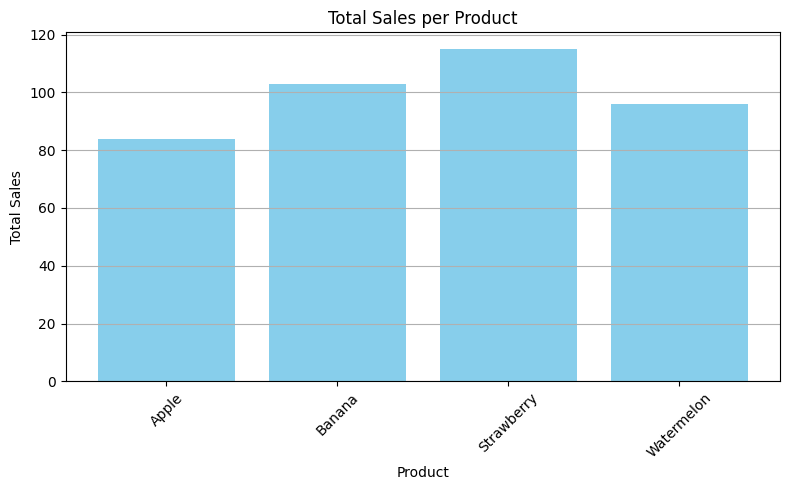

In [11]:
# Plotting
plt.figure(figsize=(8,5))
plt.bar(grouped_df['product'], grouped_df['sales'], color='skyblue')
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Export to Excel (corrected)
with pd.ExcelWriter('sales_report.xlsx', engine='openpyxl') as writer:
    grouped_df.to_excel(writer, index=False, sheet_name='Sales Summary')